In [1]:
from myutils.plotters import StandardPlotter
from construct_variables import (extract_values,
                                 uppercase_letters)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
vals_all = extract_values('../', exclude=['../9_0-Rhop_FarRad1',
                                          '../3_1-Rhop-LeftPhenyl',
                                          '../3_2-Rhop-RightPhenyl',
                                          '../4_0-inchain',
                                          '../4_1-inchainLarger',
                                          '../7_0-triple_broken',
                                          '../8_0-Hshift_FarRad1',
                                          '../8_1-Hshift_FarRad2',
                                          '../9_1-Rhop_FarRad2'])

0 ../1_0-AlkylShift
1 ../2_0-Hshift
2 ../3_0-Rhop
3 ../5_0-primary_in_ring
4 ../6_0-primary_in_triple


In [3]:
# Selected for the paper
vals= vals_all[[4, # Primary_in_triple
                3, # primary_in_ring
                2, # rhop
                0, # alkylshift
                1]] #H-shift

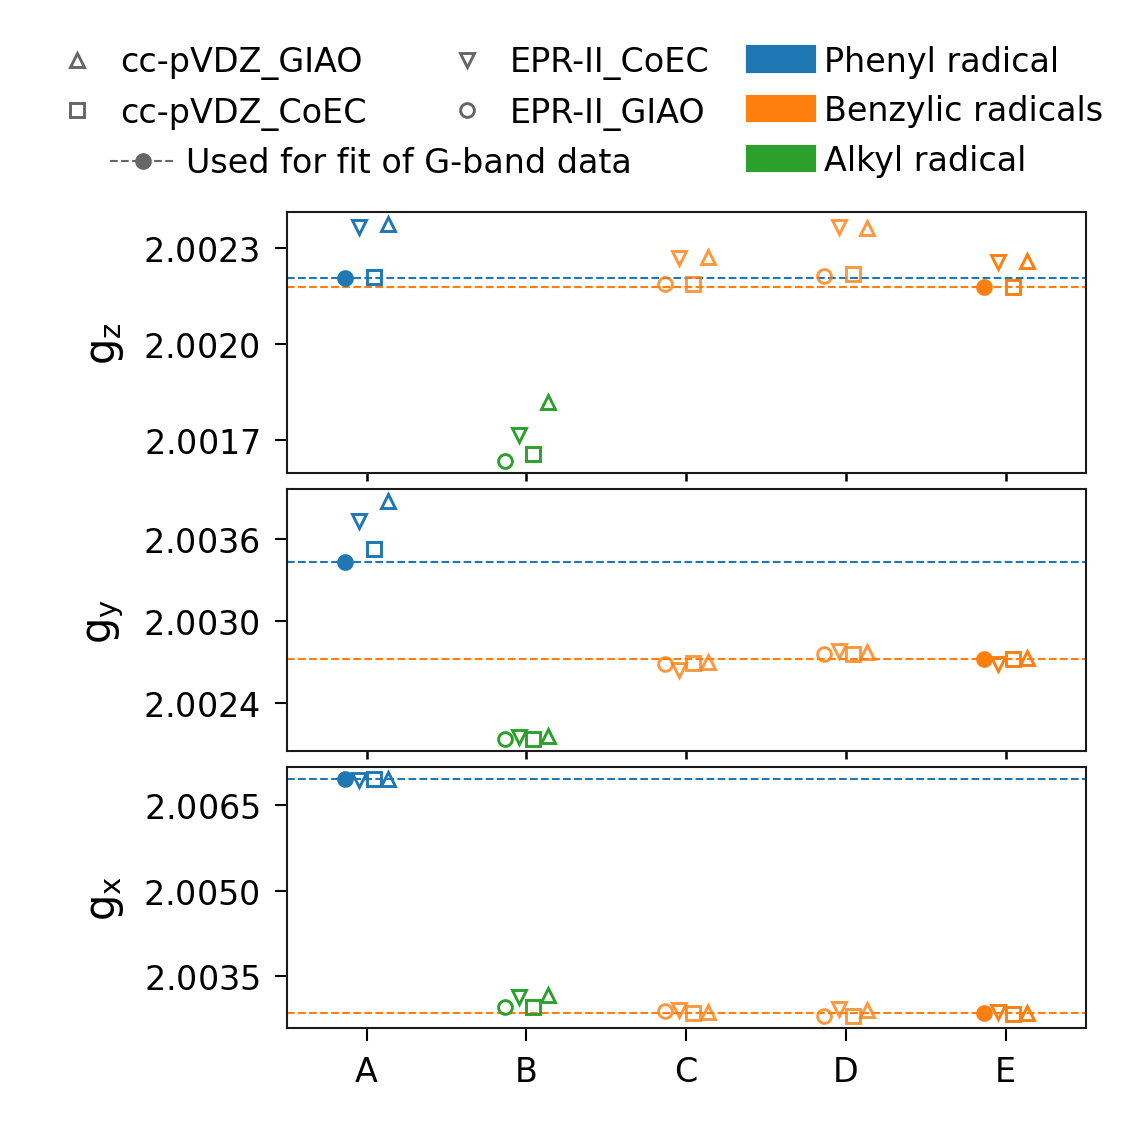

In [4]:
fig, ax = plt.subplots(3,1)
xlims = (0.5, 5.5)
sp = StandardPlotter(fig=fig, figheight=9, ax=ax, ax_pref={'sci_not':True, 'xlim': xlims})

new_order = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
sp.change_general_pars({'axes.prop_cycle': mpl.cycler(color=new_order)})
yticks = [[2.0017, 2.0020, 2.0023],
          [2.0024, 2.0030, 2.0036],
          [2.0035, 2.0050, 2.0065]]

xyz_lab = ['x', 'y', 'z']

labels_per_method = ['cc-pVDZ_GIAO', 'cc-pVDZ_CoEC', 'EPR-II_CoEC', 'EPR-II_GIAO']
style_per_method = ['^', 's', 'v', 'o']
ms_per_method = np.array([5.5, 5.5, 5.5, 5.5])*0.6
c0 = np.array([0.12156862745, 0.46666666666, 0.705882352941])
c1 = np.array([1, 0.4980392156862745, 0.054901960784313725])
c2 = np.array([0.17254901960, 0.6274509803921569, 0.17254901960784313])
lighter=0.02
# colors_per_structure = [ c0, c2, c1 + lighter, c1 + lighter, c1]
colors_per_structure = [ c0, c2, c1, c1, c1]
alphas_per_structure = [ 1, 1, 0.8, 0.8, 1]

delta = 0.09
for i in [0, 1, 2]: #x, y, z
    # Add used values
    sp.plot_data(xlims,
                 [vals[:, :, 2 - i].T[3][0]]*2,
                 ax=i,
                 pstyle='--',
                 color_plot=colors_per_structure[0],
                 lw =0.5)

    sp.plot_data(xlims,
                 [vals[:, :, 2 - i].T[3][-1]]*2,
                 ax=i,
                 pstyle='--',
                 color_plot=colors_per_structure[-1],
                 lw =0.5)
    for m in [0,1,2,3]: # methods
        for e in [0,1,2,3,4]: #structure
            if m == 3 and ( e == 0 or e == 4 ):
                fill = colors_per_structure[e]

            else:
                fill = 'none'

            sp.plot_data([e + 1 - m*delta + delta*1.5],[vals[:, :, 2 - i].T[m][e]], ax=i,
                         color_plot=colors_per_structure[e],
                         pstyle=style_per_method[m],
                         markersize=ms_per_method[m],
                         markeredgewidth=0.7,
                         mfc=fill,
                         alpha=alphas_per_structure[e])

    sp.axis_setter(ax=i,
                   ylabel=r'g$_{\rm{ ' + xyz_lab[2 - i] +'}}$',
                   xminor=[1,2,3, 4, 5],
                   xticks=[],
                   yticks=yticks[i])
upper_shift = 0.012
# Setting axis
sp.ax[2].set_xticks(range(1, len(vals)+1),
                    uppercase_letters[:len(vals)])
sp.spaces[0].set_axis(axes=sp.ax, rows_cols=(3, 1),
                      borders=[[0.22, 0.06], [0.98, 0.84 - upper_shift]],
                      spaces=[0.015, 0.015])

# Legends methods
labels = ['trial']
#sp.style_per_method

for index, marker in enumerate(style_per_method):
    #if index == 3:
    #    fill = (0.4,0.4,0.4)
    #else:
    #    fill = 'none'
    sp.spaces[0].frame.plot([], marker,
                            lw =0.5,
                            color=(0.4,0.4,0.4),
                            label=labels_per_method[index],
                            ms=ms_per_method[index],
                            markeredgewidth=0.7,
                            mfc='none')

sp.axis_setter(ax=sp.spaces[0].frame,
               xlim=[0,1],
               ylim=[0,1],
               color_spines=[1,1,1])
legend = sp.spaces[0].frame.legend(
                        loc='upper left',
                        bbox_to_anchor=(-0.04, 1.025 - upper_shift),
                        ncols=2,
                        fontsize=8,
                        handletextpad=0.3)
legend.get_frame().set_alpha(0)


color_patches = [mpl.patches.Patch(color=c0), mpl.patches.Patch(color=c1), mpl.patches.Patch(color=c2)]
color_labels = ['Phenyl radical', 'Benzylic radicals', 'Alkyl radical']
sp.add_space()
legend2 = sp.spaces[1].frame.legend(color_patches,
                        color_labels,
                        loc='center left',
                        bbox_to_anchor=(0.630, 0.935 - upper_shift),
                        ncols=1,
                        fontsize=8,
                        handletextpad=0.3)
legend2.get_frame().set_alpha(0)

sp.add_space()
sp.spaces[2].frame.plot([], 'o--',
                        lw =0.5,
                        ms=ms_per_method[index],
                        color=(0.4,0.4,0.4),
                        label='Used for fit of G-band data',
                        markeredgewidth=0.7)
legend3 = sp.spaces[2].frame.legend(
                        loc='upper center',
                        bbox_to_anchor=(0.3, 0.93 - upper_shift),
                        ncols=1,
                        fontsize=8,
                        handletextpad=0.3)
legend3.get_frame().set_alpha(0)

#sp.spaces[0].show_frame(majordelta=0.1, minordelta=0.025)

In [5]:
sp.fig.savefig('g-values.eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
sp.fig.savefig('g-values.jpeg', dpi=300)


In [7]:
sp.fig.savefig('g-values.png', dpi=300)